<a href="https://colab.research.google.com/github/jensontmathew/TATA-Motors-Stock-Price-Prediction/blob/main/Tata_Motors_stock_price_prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as pl

In [3]:
# Get the stock data
data = yf.download("TATAMOTORS.NS", period="5y")
# Print the stock data
# print(data)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-05,173.000000,173.000000,168.600006,169.199997,168.674286,14960527
2018-12-06,168.500000,168.699997,161.600006,162.649994,162.144638,15428019
2018-12-07,162.250000,164.199997,160.800003,162.399994,161.895416,13545006
2018-12-10,159.899994,160.500000,156.500000,157.100006,156.611893,13520495
2018-12-11,155.000000,159.500000,154.649994,158.100006,157.608795,12094881


In [6]:
#saving the file
tata_data=df.to_csv('tatastock.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2018-12-05 to 2023-12-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1236 non-null   float64
 1   High       1236 non-null   float64
 2   Low        1236 non-null   float64
 3   Close      1236 non-null   float64
 4   Adj Close  1236 non-null   float64
 5   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.6 KB


In [8]:
df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)

In [9]:
df.reset_index(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1236 non-null   datetime64[ns]
 1   Close   1236 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.4 KB


In [11]:
df['Date']=pd.to_datetime(df['Date'])

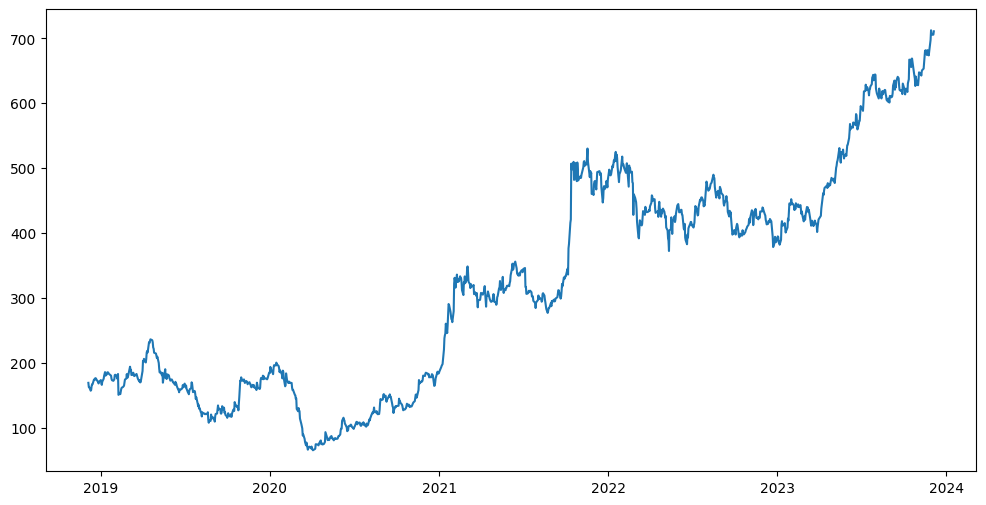

In [42]:
# plotting
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'])

In [13]:
trace=pl.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Date'
)

layout=pl.Layout(
    title='Tata Stock',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}

)

fig=pl.Figure(data=[trace],layout=layout)
fig.show()

In [14]:
close_data=df['Close'].values

In [15]:
close_data

array([169.19999695, 162.6499939 , 162.3999939 , ..., 705.45001221,
       705.59997559, 710.75      ])

In [16]:
#reshaping
close_data=close_data.reshape(-1,1)

In [17]:
close_data

array([[169.19999695],
       [162.6499939 ],
       [162.3999939 ],
       ...,
       [705.45001221],
       [705.59997559],
       [710.75      ]])

In [18]:
split_percentile=0.80
split=int(split_percentile*len(close_data))

In [19]:
split

988

In [20]:
close_train=close_data[:split]
close_test=close_data[split:]

In [21]:
date_train=df['Date'][:split]
date_test=df['Date'][split:]

In [22]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
look_back=15
train_generator=TimeseriesGenerator(close_train,close_train,length=look_back,batch_size=20)

In [24]:
print(train_generator)

In [25]:
test_generator=TimeseriesGenerator(close_test,close_test,length=look_back,batch_size=1)

In [26]:
model=Sequential()
model.add(LSTM(10,activation='relu',input_shape=(look_back,1)))
model.add(Dense(1))

In [27]:
model.compile(optimizer='adam',loss='mse')

In [28]:
model.fit(train_generator,epochs=100)

Epoch 1/100
49/49 [==============================] - 2s 9ms/step - loss: 110626.0938
Epoch 2/100
49/49 [==============================] - 0s 9ms/step - loss: 107630.2500
Epoch 3/100
49/49 [==============================] - 1s 14ms/step - loss: 104422.0547
Epoch 4/100
49/49 [==============================] - 1s 14ms/step - loss: 100942.4844
Epoch 5/100
49/49 [==============================] - 1s 13ms/step - loss: 96746.3047
Epoch 6/100
49/49 [==============================] - 1s 10ms/step - loss: 92376.1172
Epoch 7/100
49/49 [==============================] - 0s 9ms/step - loss: 82951.7422
Epoch 8/100
49/49 [==============================] - 0s 9ms/step - loss: 54570.1406
Epoch 9/100
49/49 [==============================] - 0s 9ms/step - loss: 21686.8965
Epoch 10/100
49/49 [==============================] - 0s 9ms/step - loss: 20950.3457
Epoch 11/100
49/49 [==============================] - 0s 9ms/step - loss: 13928.4746
Epoch 12/100
49/49 [==============================] - 0s 9ms/step 

In [29]:
prediction=model.predict(test_generator)

233/233 [==============================] - 2s 6ms/step


In [30]:
#reshapeing again for plotting
close_train=close_train.reshape((-1))
close_test=close_test.reshape((-1))
prediction=prediction.reshape((-1))

In [31]:
trace1=pl.Scatter(
    x=date_train,
    y=close_train,
    mode='lines',
    name='train_data'
)

trace2=pl.Scatter(
    x=date_test,
    y=close_test,
    mode='lines',
    name='test_data'
)

trace3=pl.Scatter(
    x=date_test,
    y=prediction,
    mode='lines',
    name='prediction',
    fillcolor='blue'
)

layout=pl.Layout(
    title='Google Stock',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}
)

fig=pl.Figure(data=[trace1,trace2,trace3],layout=layout)
fig.show()

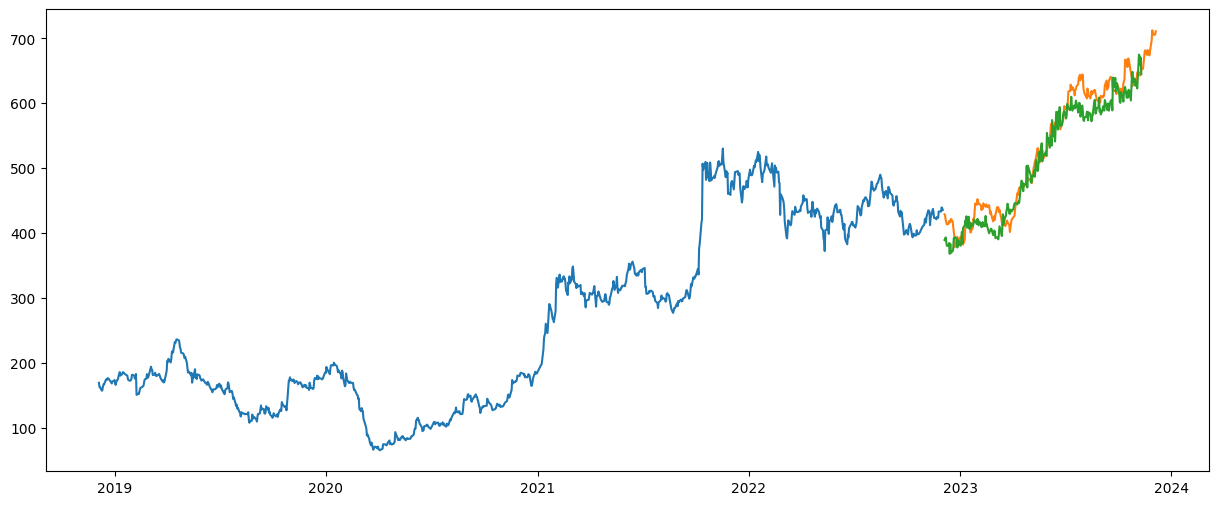

In [40]:
date_test1=date_test[:233]
plt.figure(figsize=(15,6))
plt.plot(date_train,close_train)
plt.plot(date_test,close_test)
plt.plot(date_test1,prediction)